# Pruebas de exportar casillas con OpenCV

OpenCV utiliza imagenes como base, pero tengo pdf's.
Primero tendré que convertir cada página en un png.

## Convertir pdf a imagen

Probando que lo exporta de forma correcta (algunas herramientas dan conflictos con las casillas)

In [6]:
from pdf2image import convert_from_path

In [7]:
file_name = '../../pyexams examples/en/question/question_11111.pdf'

In [8]:
pages = convert_from_path(file_name, 500)

for page in pages:
    page.save('png/question_11111.png')

Genera los png sin quitar las casillas: OK

## Preprocesamiento

In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [17]:
file = '../../pyexams examples/en/png/page_0.png'

escala de grises y umbralización

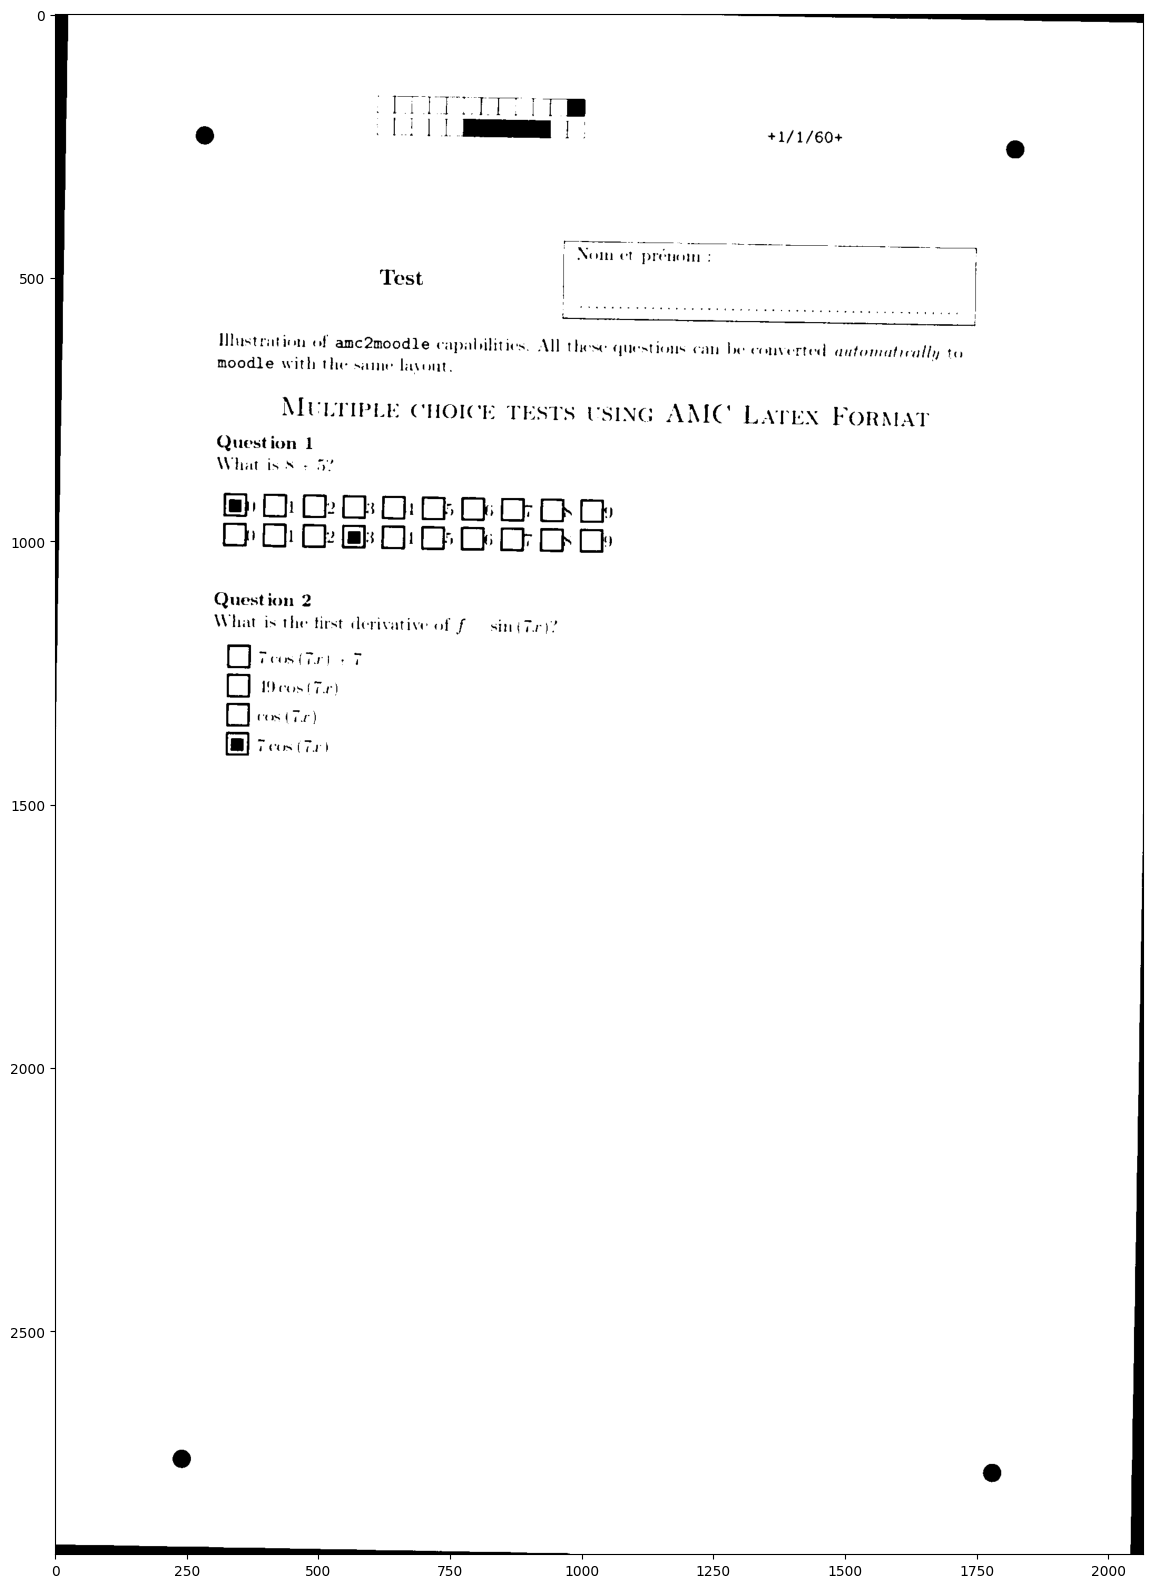

In [18]:
img = cv2.imread(file)
gray_scale=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
th1,img_bin = cv2.threshold(gray_scale,150,225,cv2.THRESH_BINARY)
img_bin=~img_bin
plt.figure(figsize=(20,20))
plt.imshow(~img_bin, cmap='gray')

aislar lineas de longitud mayor a line_min_width:20, tanto horizontales como verticales

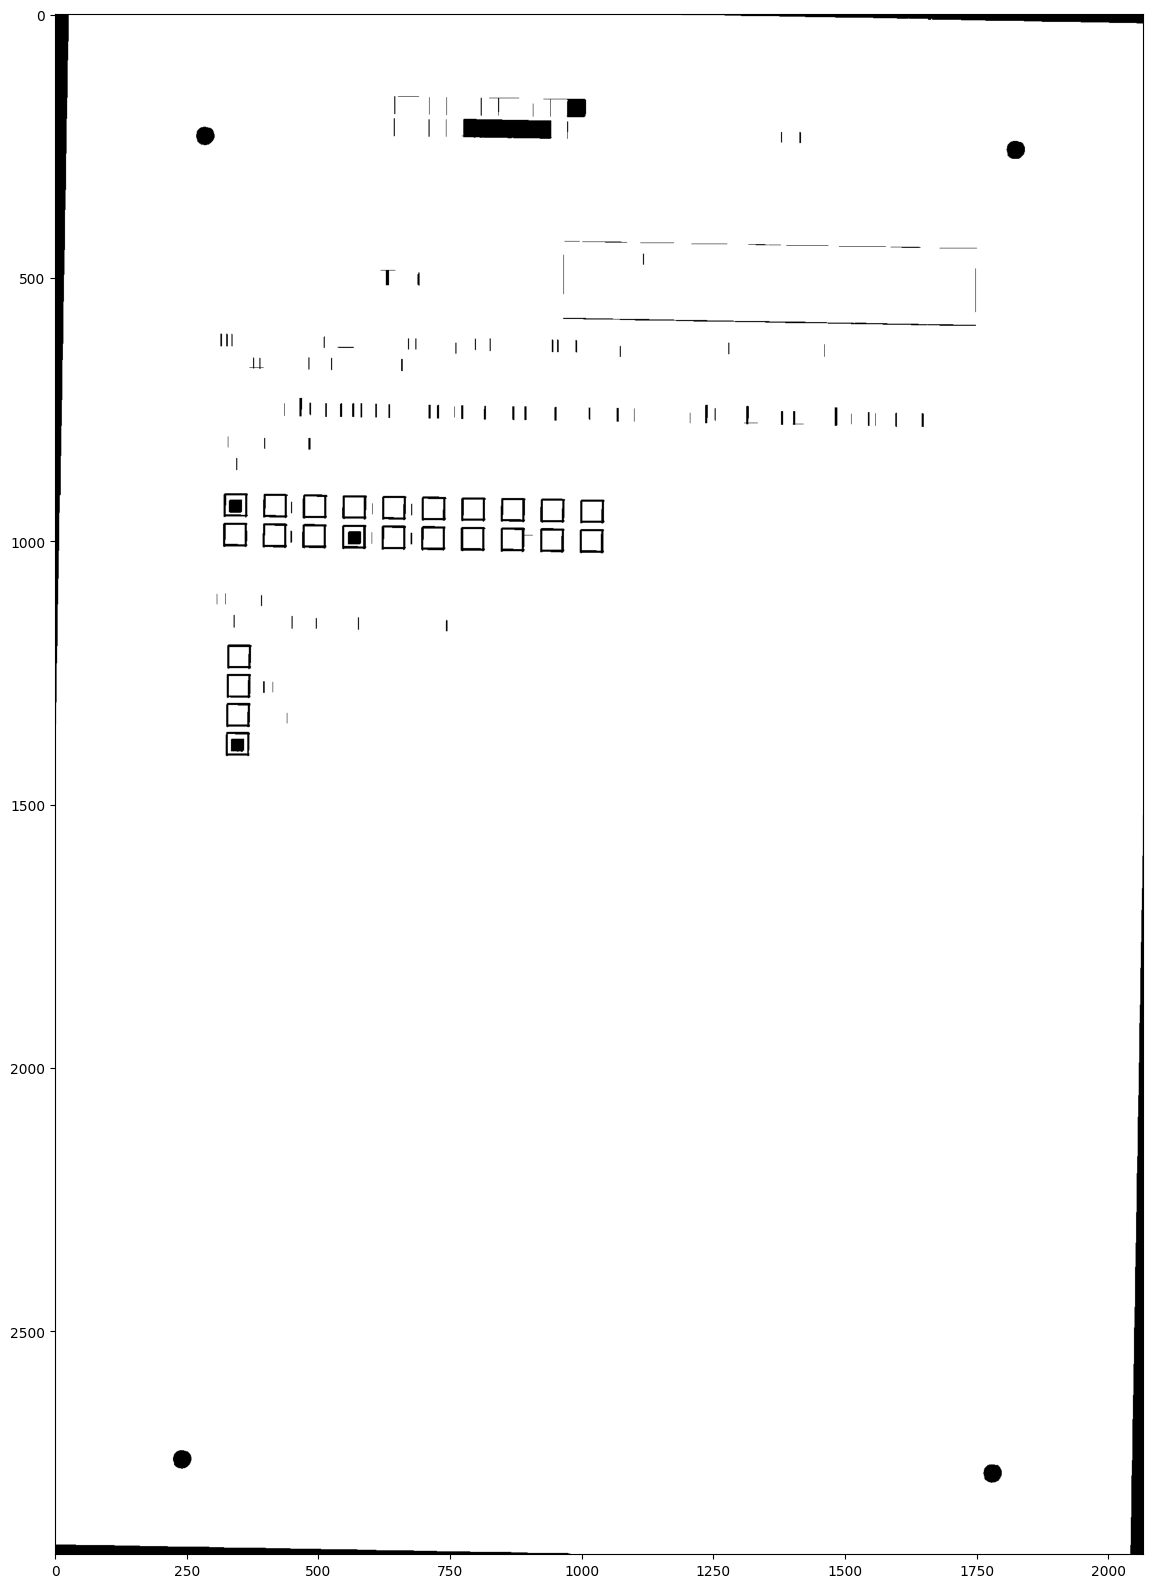

In [19]:
### selecting min size as 15 pixels
line_min_width = 20
kernal_h = np.ones((1,line_min_width), np.uint8)
kernal_v = np.ones((line_min_width,1), np.uint8)

# find horizontal lines
img_bin_h = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_h)
#plt.figure(figsize=(20,20))
#plt.imshow(img_bin_h)
# find vertical lines
img_bin_v = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_v)
#plt.figure(figsize=(20,20))
#plt.imshow(img_bin_v)
# join horizontal and vertical lines
img_bin_final = img_bin_h | img_bin_v
plt.figure(figsize=(20,20))
plt.imshow(~img_bin_final, cmap='gray')

## Encontrar casillas

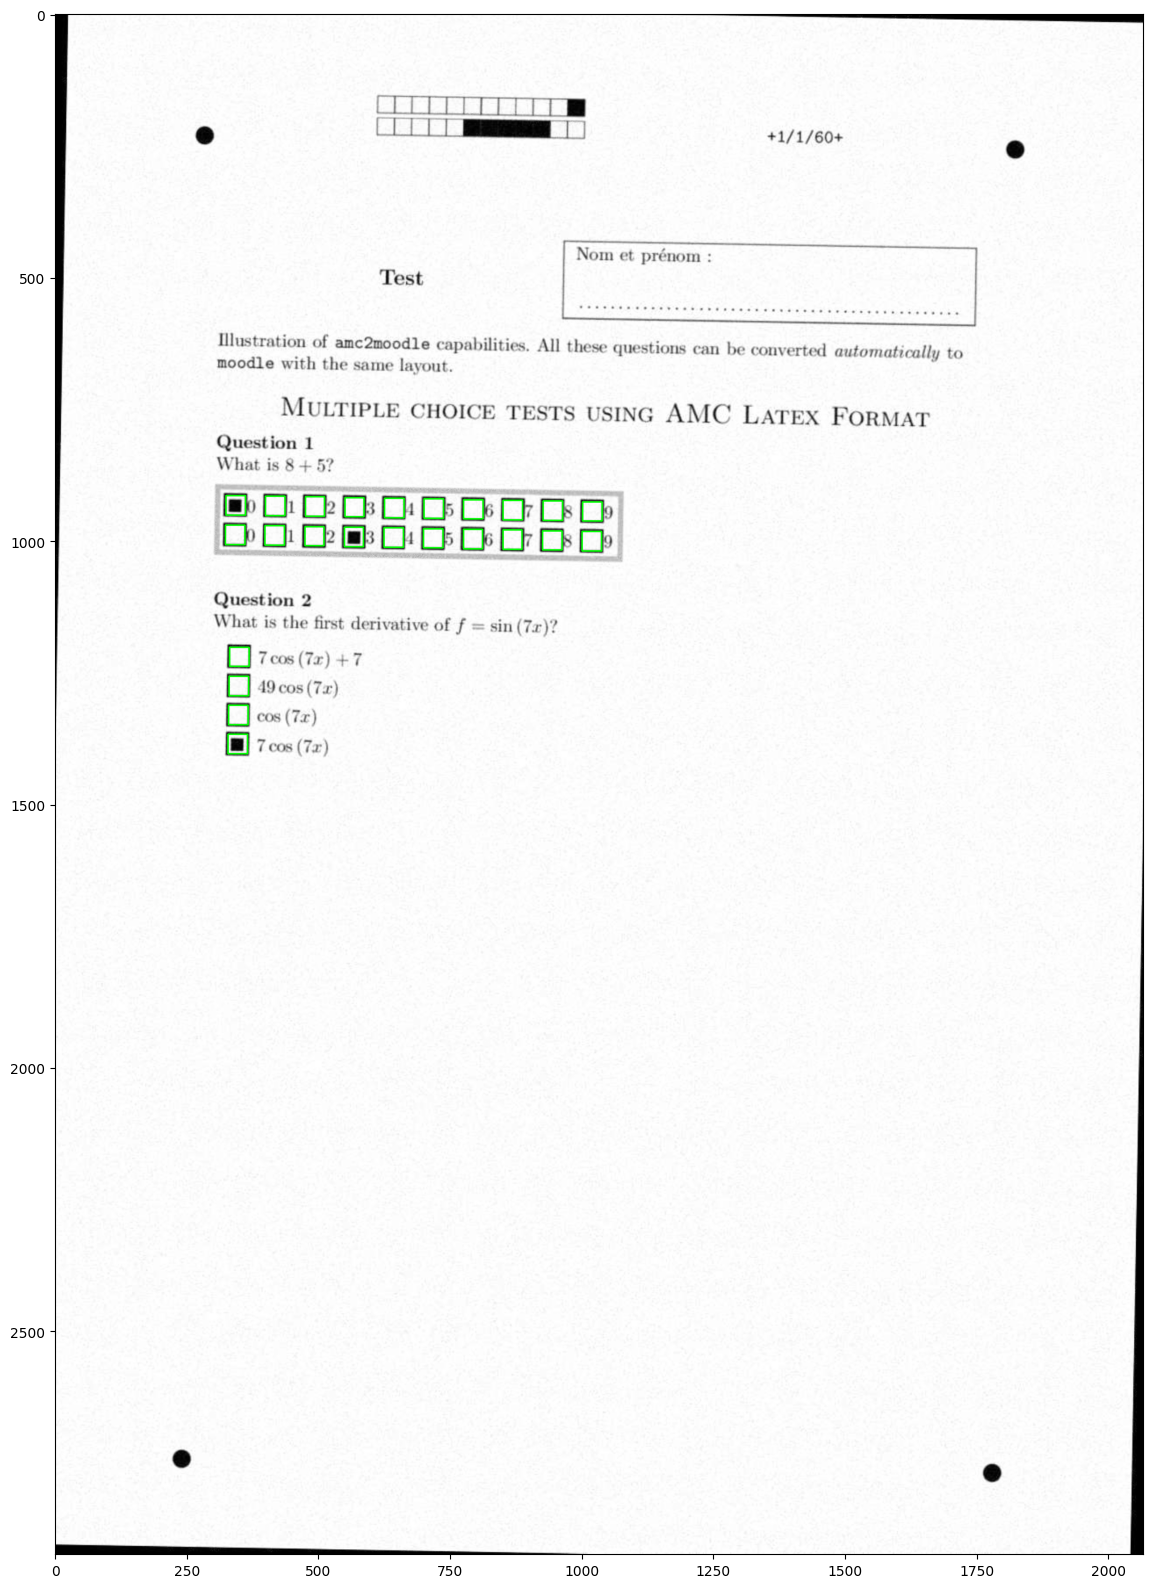

In [26]:
_, labels, stats,_ = cv2.connectedComponentsWithStats(~img_bin_final, connectivity=8, ltype=cv2.CV_32S)

for x,y,w,h,area in stats[2:]:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

plt.figure(figsize=(20,20))
plt.imshow(img)

Áreas de las casillas

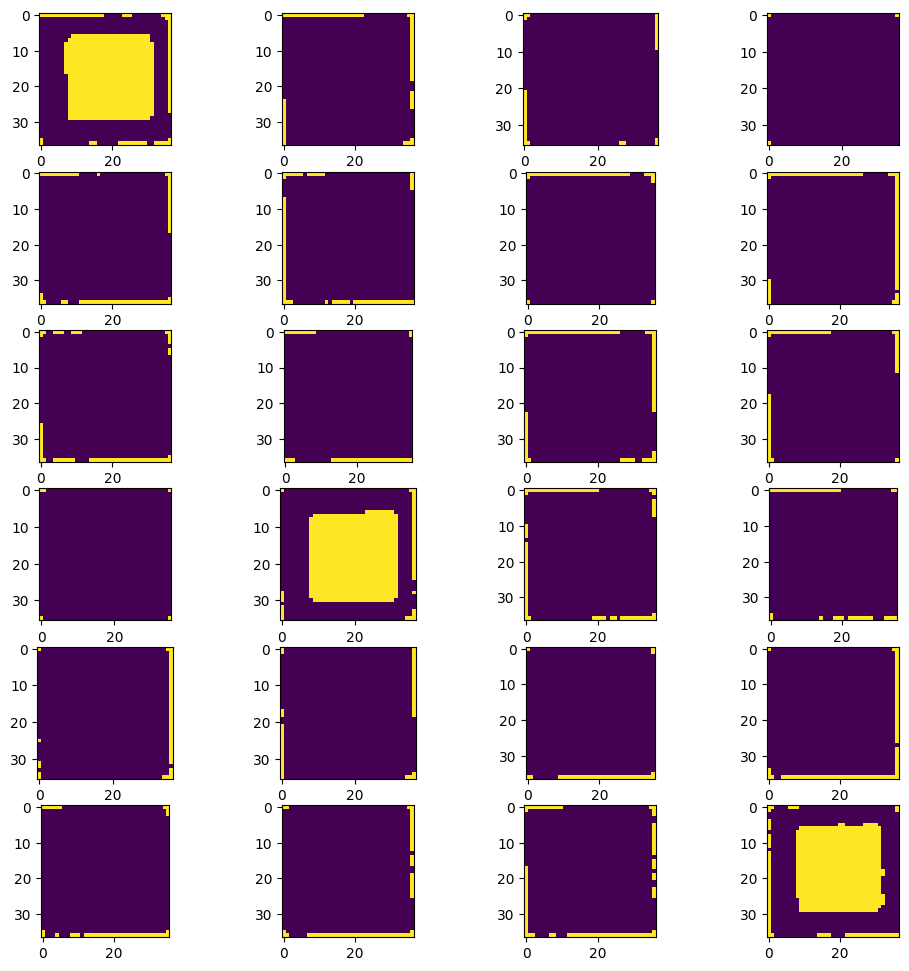

In [30]:
inner_boxes = []
for x,y,w,h,_ in stats[2:]:
    x2,y2 = x+w,y+h
    inner_boxes.append(img_bin[y:y2].transpose()[x:x2])

fig = plt.figure(figsize=(12, 12))
columns = 4
rows = 6
for i, box in enumerate(inner_boxes):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(box)
plt.show()